In [17]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

## Define error function

Error function is used as performance indicator (we need to minimize it)

In [18]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    
    # getting error from each point
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
        
    # normalize total error by number of points
    return totalError / float(len(points))

## Gradient update function 

At each step we adjust new values of b and m

In [19]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    # getting new b and m values based on data set
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    # use of learningRate parameter to have slope slowly (b and m adjust and to get better linear regression)
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

## Gradient runner function

We run step gradient a number of times

In [20]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

## Display information and run

In [21]:
def run():
    points = genfromtxt("gradientDescentData.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10000
    
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    # Display part
    X = points[:, 0]
    Y = points[:, 1]
    plt.scatter(X, Y, s=20)
    plt.plot([x*m+b for x in range(100)], color='red')
    plt.title("Gradient descent regression")
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10000 iterations b = 0.6078985997054931, m = 1.4675440436333027, error = 112.31533427075733


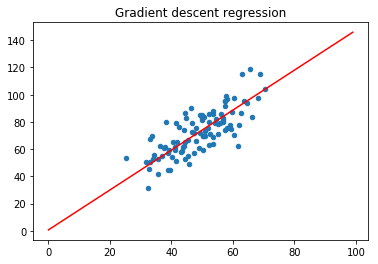

In [22]:
if __name__ == '__main__':
    run()